# Homework 03 - Nonstandard Evaluation and Git

## Nonstandard Evaluation


### Question 1
Imagine we have a data frame called `data`, with a `type` column. Which one works and why?\
Function 1:
```
group_and_tally <- function(df, column){
    df %>% group_by({{ column }}) %>% tally();
}
group_and_tally(data, type);
```

Function 2:
```
group_and_tally <- function(df, column){
    df %>% group_by(column) %>% tally();
}
group_and_tally(data, type);
```

In [ ]:
# Answer: Function 1 works due to the {{ }} "embrace" around the word "column,"
# allowing us to utilize the column with the name "type," instead of utilizing
# "column" itself. Due to the tidyverse and non-standard evaluation, Function 2 
# (without the embrace) results in an error because there is no column with the 
# name "column" to evaluate.

## Git
For the questions below, please add the commands you used to complete these steps.

### Question 2
Set up your git repo on your local computer. If you already make a git repo on GitHub, but it isn’t on your local computer - clone it.

In [ ]:
git init
git add README.md
git commit -m "initial commit"

### Question 3
Set up your SSH key.

In [ ]:
git config --global user.name "Grace"
git config --global user.email "gyebkodie@gmail.com"
ssh-keygen -t ed25519 -C "gyebkodie@gmail.com"
eval "$(ssh-agent -s)"
ssh-add ~/.ssh/id_ed25519
cat ~/.ssh/id_ed25519.pub
ssh -T git@github.com
{entered my passphrase}

### Question 4
a) Add a HW2 directory to your git repo through the terminal with a HW.md file that says "This is for homework 2."


In [ ]:
mkdir HW2
echo "This is for Homework 2." > HW2/HW.md

b) *Add* HW2.md to the staging area. Then, use the command to see which files have been modified, staged for commit, or are untracked. What does it show?
They should copy paste the terminal response after git status, and show that key used the commands below.

In [ ]:
git add HW2/HW.md
git add status

$ git status
On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
        new file:   HW2/HW2.md


c) Save file changes to the main branch.

In [ ]:
git commit -m "Save HW2 file changes"

d) Now, edit the HW2.md file to give it a title.

In [ ]:
$ cat <<EOF > HW2.md
> Homework 2
> EOF

e) Use the command that compares current, unsaved changes to the main branch. What does it say?\
\
f) Use the command that checks the status of the working directory and the staging area *again*. What does it say?\
\
g) Once again, add HW2.md to the staging area and save the file changes to the main branch. Then, get use the command that gives you project history and paste the output in your homework.

In [ ]:
# e)
$ git diff
warning: in the working copy of 'HW2/HW2.md', LF will be replaced by CRLF the next time Git touches it
diff --git a/HW2/HW2.md b/HW2/HW2.md
index a0db069..e4e6b4d 100644
--- a/HW2/HW2.md
+++ b/HW2/HW2.md
@@ -1 +1 @@
-This is for Homework 2.
+# Homework 2

#f)
$ git status
On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
        modified:   HW2/HW2.md

Untracked files:
  (use "git add <file>..." to include in what will be committed)
        HW2.md

no changes added to commit (use "git add" and/or "git commit -a")


#g)
git add HW2/HW2.md
$ git commit -m "New HW2 title"
[main ee6e238] New HW2 title
 1 file changed, 1 insertion(+), 1 deletion(-)

gryeboah@G-UNC-PF4WXM7A MINGW64 ~/repository-gyk (main)
$ git log
commit ee6e238bb7ff3c9c6b86aba1520fcc98ba34a63a (HEAD -> main)
Author: Grace <gyebkodie@gmail.com>
Date:   Thu Sep 11 15:13:03 2025 -0400

    New HW2 title

commit 2285459bec0d35149ba448edccd13f1e7013c9c2
Author: Grace <gyebkodie@gmail.com>
Date:   Thu Sep 11 15:05:21 2025 -0400

    Save Hw2 file changes

commit 5999f9bd138e71d68b901f3c8a874091c3d28671 (origin/main, origin/HEAD)
Author: gyeb-kodie <gyebkodie@gmail.com>
Date:   Thu Sep 11 14:45:23 2025 -0400

    test

commit fe7d5e7ce4881dce95f7754979871f67d450605f
Author: gyeb-kodie <gyebkodie@gmail.com>
Date:   Tue Sep 9 14:50:25 2025 -0400

    Add files via upload
:

h) Do some searching... What `git` command will provide you documentation on other commands? Use that command to find documentation on `git log` and `git show`. What does `--since` mean in regards to `git log`? Copy and paste what is written in the documentation.

In [ ]:
git help <command> provides documentation.

--since refers to the log since a specific date:

--since=<date>
    Show commits more recent than <date>.


## Tidyverse

Note: Please make sure Binder is set up correctly to run this section. You can follow the instructions here: https://github.com/rjenki/BIOS512. 

**Please show your code for this section!** Before completing this section, please run the following.

In [2]:
library(tidyverse)
if (!dir.exists("intermediate")) dir.create("intermediate", recursive = TRUE)
if (!exists("mdpre")) mdpre <- function(x) { print(x) }
if (!exists("ggmd"))  ggmd  <- function(p) { print(p) }

### Question 5

Download the patient_names.csv and patient_properties.csv files from Canvas and read them into R. Manually set the date columns to be date variables. Print the first 10 observations of each.

In [5]:
library(tidyverse)

ptnames <- read_csv("patient_names.csv")
ptproperties <- read_csv("patient_properties.csv")

class(ptnames$BIRTHDATE)
class(ptnames$DEATHDATE)

ptnames$BIRTHDATE <- as.Date(ptnames$BIRTHDATE, format = "%m/%d/%y")
ptnames$DEATHDATE <- as.Date(ptnames$DEATHDATE, format = "%m/%d/%Y")

ptnames$BIRTHDATE[1:10]
ptnames$DEATHDATE[1:10]


Rows: 974 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): ID, BIRTHDATE, DEATHDATE, FIRST, LAST, CITY, STATE

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 3896 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): ID, property, value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "character"

[1] "character"

[1] "1977-03-19" "2040-02-19" "2058-06-04" "2028-12-25" "2028-12-25"
 [6] "2028-12-25" "2057-11-08" "1972-06-27" "2054-03-06" "2027-07-10"

[1] NA         NA         NA         "17-09-29" "14-02-23" NA        
 [7] NA         NA         NA         NA

### Question 6
In the data frame pulled from patient_properties, you'll notice that the data is long, not wide. Do a pivot to make the properties their own columns. Print the first 10 observations after you do so.

In [6]:
ptproperties_w <- ptproperties %>% 
        pivot_wider(id_cols=ID, names_from=property, values_from=value)

ptproperties_w[1:10, ]

ID,MARITAL,RACE,ETHNICITY,GENDER
<chr>,<chr>,<chr>,<chr>,<chr>
5605b66b-e92d-c16c-1b83-b8bf7040d51f,M,white,nonhispanic,F
6e5ae27c-8038-7988-e2c0-25a103f01bfa,M,white,nonhispanic,M
8123d076-0886-9007-e956-d5864aa121a7,M,white,nonhispanic,M
770518e4-6133-648e-60c9-071eb2f0e2ce,M,white,hispanic,M
f96addf5-81b9-0aab-7855-d208d3d352c5,M,white,hispanic,M
8e9650d1-788a-78f9-4a28-d08f7f95354a,M,white,hispanic,M
183df435-4190-060e-8f8e-bf63c572b266,M,asian,nonhispanic,F
720560d4-51da-c38c-ee90-c15935278df1,M,white,nonhispanic,M
217851b0-5f47-d376-18b9-0fe4ba77207e,S,black,hispanic,M


### Question 7
Perform a left join of the names and properties_wide data frames by the ID column and print the first 10 rows.

In [7]:
pt_leftjoin <- ptnames %>%
  left_join(ptproperties_w, by = c("ID" = "ID"))

pt_leftjoin[1:10, ]

ID,BIRTHDATE,DEATHDATE,FIRST,LAST,CITY,STATE,MARITAL,RACE,ETHNICITY,GENDER
<chr>,<date>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NA,Nikita578,Erdman779,Quincy,Massachusetts,M,white,nonhispanic,F
6e5ae27c-8038-7988-e2c0-25a103f01bfa,2040-02-19,NA,Zane918,Hodkiewicz467,Boston,Massachusetts,M,white,nonhispanic,M
8123d076-0886-9007-e956-d5864aa121a7,2058-06-04,NA,Quinn173,Marquardt819,Quincy,Massachusetts,M,white,nonhispanic,M
770518e4-6133-648e-60c9-071eb2f0e2ce,2028-12-25,17-09-29,Abel832,Smitham825,Boston,Massachusetts,M,white,hispanic,M
f96addf5-81b9-0aab-7855-d208d3d352c5,2028-12-25,14-02-23,Edwin773,Labadie908,Boston,Massachusetts,M,white,hispanic,M
8e9650d1-788a-78f9-4a28-d08f7f95354a,2028-12-25,NA,Frankie174,Oberbrunner298,Boston,Massachusetts,M,white,hispanic,M
183df435-4190-060e-8f8e-bf63c572b266,2057-11-08,NA,Eilene124,Walsh511,Cambridge,Massachusetts,M,asian,nonhispanic,F
720560d4-51da-c38c-ee90-c15935278df1,1972-06-27,NA,Lowell343,Price929,Quincy,Massachusetts,M,white,nonhispanic,M
217851b0-5f47-d376-18b9-0fe4ba77207e,2054-03-06,NA,Adrian111,Gleason633,Boston,Massachusetts,S,black,hispanic,M


### Question 8
Notice something interesting about the names in our data set. Fix the name formatting and print the first 10 observations.

In [8]:
# All first and last names are followed by 3 seemingly random digits.

pt_leftjoin$FIRST <- substr(pt_leftjoin$FIRST, 1, nchar(pt_leftjoin$FIRST) - 3)
pt_leftjoin$LAST <- substr(pt_leftjoin$LAST, 1, nchar(pt_leftjoin$LAST) - 3)


### Question 9
Using a for statement to loop through the categorical variables (excluding name and ID), print the counts of each unique value in descending order, using the mdpre() function for formatting.

In [15]:
for (var in c("CITY", "STATE", "MARITAL", "RACE", "ETHNICITY", "GENDER")) {
  values <- pt_leftjoin[[var]]
  unique_vals <- sort(table(values), decreasing = T)
  n_unique <- length(unique_vals)
  
  cat("\nCounts:", var, "(Unique values:", n_unique, "):\n")
  print(unique_vals)
}


Counts: CITY (Unique values: 29 ):
values
        Boston         Quincy      Cambridge         Revere        Chelsea 
           541             80             45             42             39 
      Weymouth     Somerville        Hingham       Winthrop      Brookline 
            37             25             22             22             17 
       Everett           Hull        Medford      Braintree       Cohasset 
            16             15             13             10             10 
        Malden       Scituate         Newton       Stoneham North Scituate 
             8              8              6              5              3 
       Reading        Belmont      Lynnfield        Melrose         Milton 
             2              1              1              1              1 
       Norwell        Waltham      Watertown     Winchester 
             1              1              1              1 

Counts: STATE (Unique values: 1 ):
Massachusetts 
          974 

Counts: 

### Question 10
If you see any weird values, get rid of the ones that don't make sense, and combine the ones that are formatted wrong. Don't forget ot check the dates! Print the new tables for categorical values, and print the date ranges.

In [9]:
pt_new <- pt_leftjoin %>%
  mutate(
    RACE = recode(RACE,
        "asiann" = "asian"),
    
    ETHNICITY = recode(ETHNICITY,
        "hispani" = "hispanic",
        "nonhispani" = "nonhispanic"),
    
    GENDER = recode(GENDER,
        "female" = "F",
        "Female" = "F",
        "Male"   = "M")
  ) %>%
  group_by(MARITAL) %>%
  filter(n() >= 5) %>%
  ungroup()

for (var in c("CITY", "STATE", "MARITAL", "RACE", "ETHNICITY", "GENDER")) {
  values <- pt_new[[var]]
  unique_vals <- sort(table(values), decreasing = T)
  n_unique <- length(unique_vals)
  
  cat("\nCounts:", var, "(Unique values:", n_unique, "):\n")
  print(unique_vals)
  
  cat("Range for BIRTHDATE:\n")
  cat("From:", format(min(pt_new$BIRTHDATE, na.rm = T), format = "%m/%d/%y"), "\n")
  cat("To:",   format(max(pt_new$BIRTHDATE, na.rm = T), format = "%m/%d/%y"), "\n")
  
  cat("Range for DEATHDATE:\n")
  cat("From:", format(min(pt_new$DEATHDATE, na.rm = T), format = "%m/%d/%y"), "\n")
  cat("To:",   format(max(pt_new$DEATHDATE, na.rm = T), format = "%m/%d/%y"), "\n")
}


Counts: CITY (Unique values: 29 ):
values
        Boston         Quincy      Cambridge         Revere        Chelsea 
           539             79             45             42             39 
      Weymouth     Somerville        Hingham       Winthrop      Brookline 
            37             25             22             22             17 
       Everett           Hull        Medford      Braintree       Cohasset 
            16             15             13             10             10 
        Malden       Scituate         Newton       Stoneham North Scituate 
             8              8              6              5              3 
       Reading        Belmont      Lynnfield        Melrose         Milton 
             2              1              1              1              1 
       Norwell        Waltham      Watertown     Winchester 
             1              1              1              1 
Range for BIRTHDATE:
From: 01/11/69 
To: 10/08/68 
Range for DEATHDATE:
Fro

### Question 11
Make a histogram of the ages of patients by gender. 

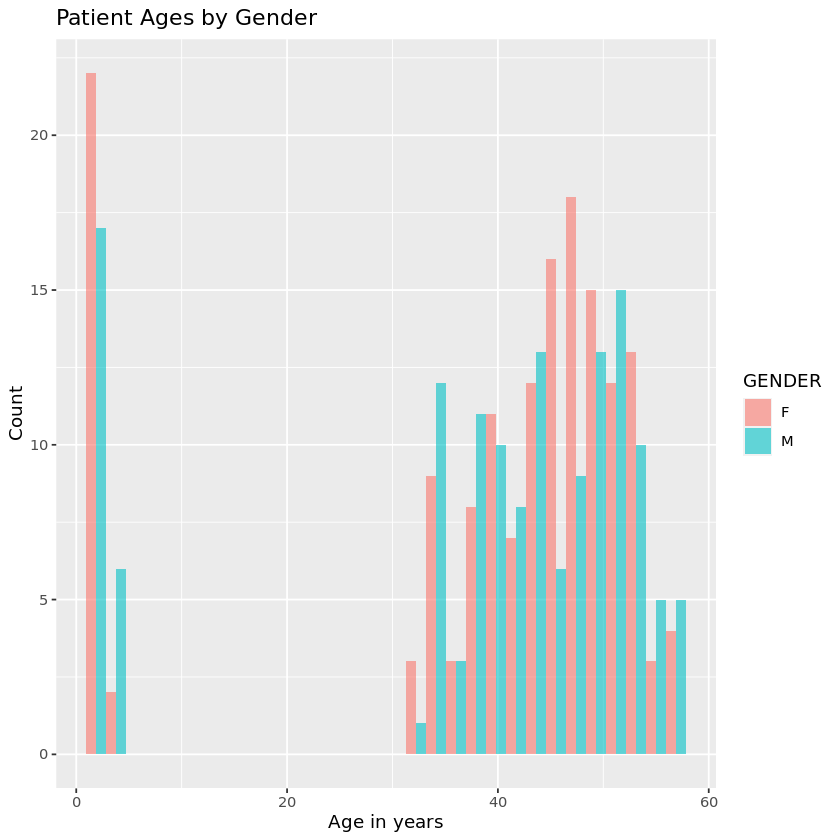

In [14]:
pt_new <- pt_new %>%
  mutate(AGE = as.numeric(floor((Sys.Date() - BIRTHDATE) / 365)))

pt_clean_ages <- pt_new %>%
  filter(AGE > 0)
# Some ages (those less than 0) are clearly implausible. While it is unlikely that
# the dataset would not include patients between ages 5-31, it is not impossible,
# and without a better understanding of the context of the data I will keep all
# observations with a positive value for their age.


ggplot(pt_clean_ages, aes(x = AGE, fill = GENDER)) +
  geom_histogram(position = "dodge", alpha = 0.6, bins = 30) +
  labs(title = "Patient Ages by Gender",
       x = "Age in years",
       y = "Count") 

### Question 12
Make a scatterplot of birthdate by martial status.

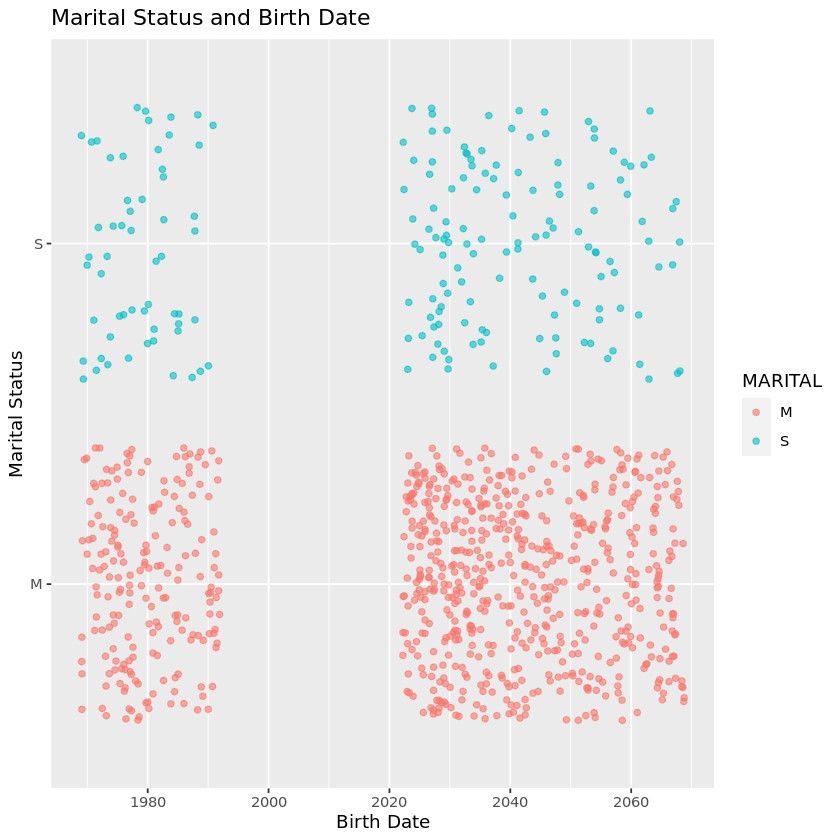

In [13]:
ggplot(pt_new, aes(x = BIRTHDATE, y = MARITAL, color = MARITAL)) +
  geom_jitter(alpha = 0.6) +
  labs(x = "Birth Date", y = "Marital Status", title="Marital Status and Birth Date")
